In [1]:
from chesslab.agent_torch import agent
from chesslab.agent_random import agent as agent_r
from chesslab.agent_stockfish import agent as s_agent
from chesslab.tests import versus
from chesslab.agent_mcts import agent_MCTS
import chess
import chess.pgn

In [2]:
import torch.nn as nn
class Model_1(nn.Module):

    def __init__(self):
        super().__init__()
        self.func_1=nn.ELU()
        self.func_2=nn.ELU()
        self.func_3=nn.ELU()
        self.func_4=nn.ELU()
        
        self.cnn_1 = nn.Conv2d(3, 32, kernel_size=7,padding=3)
        self.cnn_2 = nn.Conv2d(32, 64, kernel_size=5,padding=2)
        self.cnn_3 = nn.Conv2d(64, 128, kernel_size=3,padding=1)

        self.linear_1 = nn.Linear(8*8*128,256 )
        self.linear_2 = nn.Linear(256, 2)

    def forward(self, x ):
        out = self.cnn_1(x)
        out = self.func_1(out)
        out = self.cnn_2(out)
        out = self.func_2(out)
        out = self.cnn_3(out)
        out = self.func_3(out)
        out = out.reshape([x.size(0), -1])
        out = self.linear_1(out)
        out = self.func_4(out)
        out = self.linear_2(out)

        return out
model = Model_1()

In [3]:
deepbot = agent(model,'../tmp/test_elo.0.5.pt')
randombot = agent_r()

device: cuda


In [4]:
white_wins,black_wins,draws = versus(agent_white=randombot,agent_black=randombot)
print("White wins: {}\nBlack wins: {}\nDraws:{}".format(white_wins,black_wins,draws))

Elapsed time: 4s = 0.1m

Progress:100/100 | White wins: 9 | Black wins: 9 | Draws:82
White wins: 9
Black wins: 9
Draws:82


In [5]:
white_wins,black_wins,draws = versus(agent_white=deepbot,agent_black=randombot)
print("White wins: {}\nBlack wins: {}\nDraws:{}".format(white_wins,black_wins,draws))

Elapsed time: 156s = 2.6m

Progress:100/100 | White wins: 38 | Black wins: 1 | Draws:61
White wins: 38
Black wins: 1
Draws:61


In [6]:
board=chess.Board()
deepMCTS = agent_MCTS(temperature=2,bot=deepbot,game_state=board,verbose=2,max_iter=1000)

In [ ]:
white_wins,black_wins,draws = versus(agent_white=deepMCTS,agent_black=randombot,n_counts=10)
print("White wins: {}\nBlack wins: {}\nDraws:{}".format(white_wins,black_wins,draws))

Progress:10/100 | White wins: 10 | Black wins: 0 | Draws:0

MCTS - rollouts:1000 Elapsed time: 11.60s = 0.19m
MCTS - rollouts:1002 Elapsed time: 12.03s = 0.20m
MCTS - rollouts:1002 Elapsed time: 14.34s = 0.24m
MCTS - rollouts:1000 Elapsed time: 19.27s = 0.32m
MCTS - rollouts:1000 Elapsed time: 19.50s = 0.33m
MCTS - rollouts:1000 Elapsed time: 19.57s = 0.33m

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 20.32s = 0.34m
MCTS - rollouts:1000 Elapsed time: 19.54s = 0.33m

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 19.76s = 0.33m

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 21.74s = 0.36m

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 19.02s = 0.32m

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 18.34

In [7]:
path = 'E:/database/stockfish_14.exe'
stockfish = s_agent(path,depth=2)
white_wins,black_wins,draws = versus(agent_white=deepMCTS,agent_black=stockfish,n_counts=10)
print("White wins: {}\nBlack wins: {}\nDraws:{}".format(white_wins,black_wins,draws))

Progress:0/100 | White wins: 0 | Black wins: 0 | Draws:0

MCTS - rollouts:1000 Elapsed time: 11.06s = 0.18m
MCTS - rollouts:1002 Elapsed time: 12.96s = 0.22m
MCTS - rollouts:1002 Elapsed time: 15.43s = 0.26m
MCTS - rollouts:1000 Elapsed time: 18.65s = 0.31m
MCTS - rollouts:1000 Elapsed time: 22.24s = 0.37m
MCTS - rollouts:1000 Elapsed time: 16.37s = 0.27m
MCTS - rollouts:1000 Elapsed time: 15.96s = 0.27m
MCTS - rollouts:1011 Elapsed time: 17.98s = 0.30m
MCTS - rollouts:1000 Elapsed time: 16.38s = 0.27m
MCTS - rollouts:1000 Elapsed time: 16.45s = 0.27m
MCTS - rollouts:1006 Elapsed time: 15.90s = 0.26m
MCTS - rollouts:1000 Elapsed time: 17.27s = 0.29m

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 17.62s = 0.29m

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:1000 Elapsed time: 14.85s = 0.25m
MCTS - rollouts:1004 Elapsed time: 10.16s = 0.17m
MCTS - rollouts:1000 Elapsed time: 16.03s = 0.27m

El estado de juego no corresponde c

KeyboardInterrupt: 

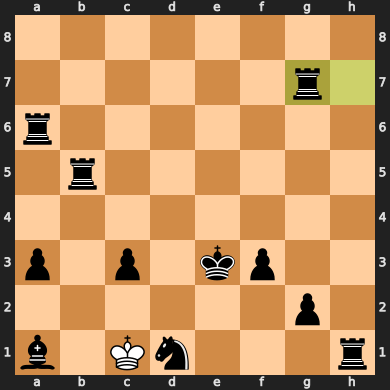

In [10]:
deepMCTS.root.game_state

In [ ]:
board=chess.Board()
board

In [ ]:
game = chess.pgn.Game()
game.headers["White"] = "MCTSBot"
game.headers["Black"] = "Stockfish14"
game.setup(board)  # Not required for the standard
                   # starting position.

blancas=deepMCTS
negras=stockfish

node = game

In [ ]:
import chess.svg
from IPython.display import display

In [ ]:
while not board.is_game_over():
    move=blancas.select_move(board)
    board.push(move)
    node = node.add_variation(move) # Add game node
    if not board.is_game_over():
        move=negras.select_move(board)
        board.push(move)
        node = node.add_variation(move) # Add game node
    #print(board)
    display(chess.svg.board(board,size=350))
    print("=="*8)
game.headers["Result"] = board.result()        
board.result()

In [ ]:
board

In [ ]:
print(game)